## Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Kaggle_classification_train.csv')
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# Estimates of count

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,36282
Dropout,25296
Enrolled,14940


In [ ]:
def weighted_average(group):
    return np.average(group['Unemployment rate'], weights=group['Unemployment rate'])

weighted_avg_per_category = df.groupby('Target').apply(weighted_average).reset_index()


weighted_avg_per_category.columns = ['Target', 'Weighted Average Unemployment Rate']

print(weighted_avg_per_category)

     Target  Weighted Average Unemployment Rate
0   Dropout                           12.245859
1  Enrolled                           11.825362
2  Graduate                           12.173551


<ipython-input-4-97c60451a715>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_per_category = df.groupby('Target').apply(weighted_average).reset_index()


In [ ]:
def weighted_average(group):
    return np.average(group['Inflation rate'], weights=group['Inflation rate'])

weighted_avg_per_category = df.groupby('Target').apply(weighted_average).reset_index()

weighted_avg_per_category.columns = ['Target', 'Weighted Average Inflation Rate']

print(weighted_avg_per_category)

     Target  Weighted Average Inflation Rate
0   Dropout                         2.924814
1  Enrolled                         2.843411
2  Graduate                         2.732501


<ipython-input-5-f16a89082531>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_per_category = df.groupby('Target').apply(weighted_average).reset_index()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
bivariate_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 3]

print("Bivariate Categorical Columns:",bivariate_categorical_cols)

Bivariate Categorical Columns: ['Target']


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
bivariate_categorical_cols = [col for col in numerical_cols if df[col].nunique() == 2]

print("Bivariate Categorical Columns:",bivariate_categorical_cols)

Bivariate Categorical Columns: ['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']


## Here are there are columns which have 2 distinct values.

['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

In [ ]:
for i in bivariate_categorical_cols:
  print('-------------------------------------------')

  print('Distinct categories :',df[i].value_counts())

-------------------------------------------
Distinct categories : Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Displaced
1    43559
0    32959
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Educational special needs
0    76232
1      286
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Debtor
0    71056
1     5462
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Tuition fees up to date
1    68380
0     8138
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Gender
0    52352
1    24166
Name: count, dtype: int64
-------------------------------------------
Distinct categories : Scholarship holder
0    57588
1    18930
Name: count, dtype: int64
-------------------------------------------
Distinct categories : International
0 

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
multiple_categorical_cols = [col for col in numerical_cols if df[col].nunique() == 6]

print("Multiple Categorical Columns:",multiple_categorical_cols)

Multiple Categorical Columns: ['Marital status']


In [ ]:
df.isnull().sum()

,0
id,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0


## There are no missing values in data

In [ ]:
df.describe(include='all')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36282
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921,NaN
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382,NaN
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000,NaN
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000,NaN


In [ ]:
df.shape

(76518, 38)

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

## Numerical variable

In [ ]:
df.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.0,19129.25,38258.5,57387.75,76517.0
Marital status,76518.0,1.111934,0.441669,1.0,1.00,1.0,1.00,6.0
Application mode,76518.0,16.054419,16.682337,1.0,1.00,17.0,39.00,53.0
Application order,76518.0,1.644410,1.229645,0.0,1.00,1.0,2.00,9.0
Course,76518.0,9001.286377,1803.438531,33.0,9119.00,9254.0,9670.00,9991.0
Daytime/evening attendance,76518.0,0.915314,0.278416,0.0,1.00,1.0,1.00,1.0
Previous qualification,76518.0,3.658760,8.623774,1.0,1.00,1.0,1.00,43.0
Nacionality,76518.0,1.226600,3.392183,1.0,1.00,1.0,1.00,109.0
Mother's qualification,76518.0,19.837633,15.399456,1.0,1.00,19.0,37.00,44.0
Father's qualification,76518.0,23.425076,14.921164,1.0,4.00,19.0,37.00,44.0


## Categorical variable

In [ ]:
df.describe(include = ['object']).T

,count,unique,top,freq
Target,76518,3,Graduate,36282


In [ ]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,52352
1,24166


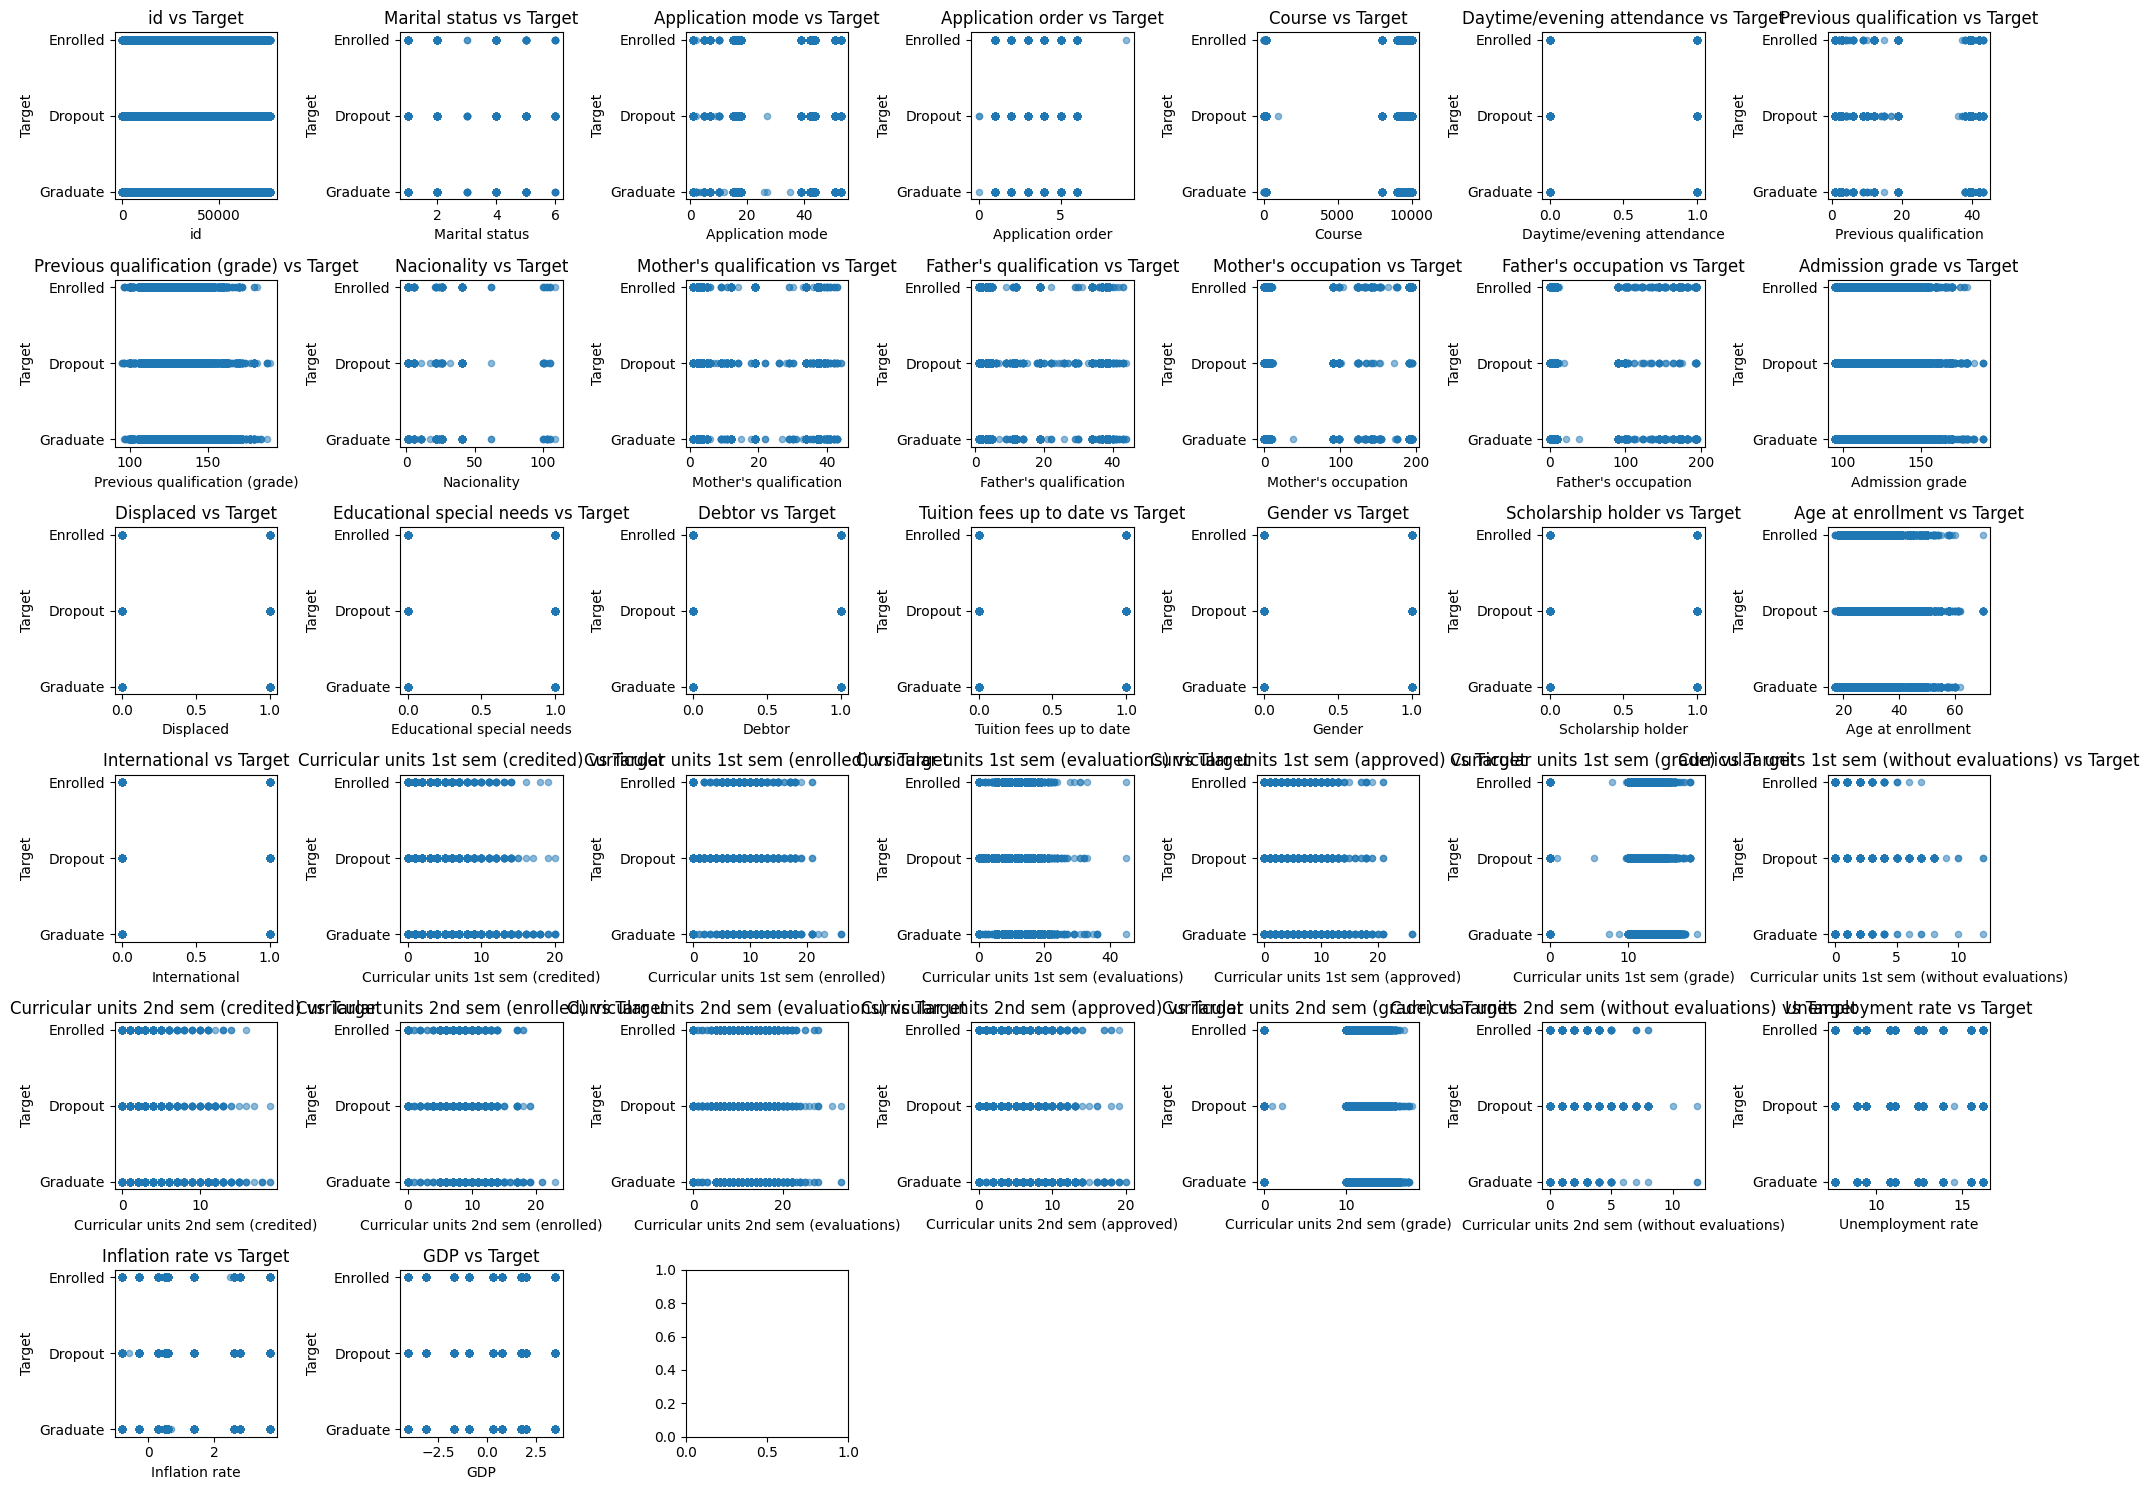

In [ ]:
target_column = 'Target'
num_column = df.select_dtypes(include=['int64','float64'])

fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(20, 15), sharex=False, sharey=False)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col != target_column:  # Skip the target column
        df.plot.scatter(x=col, y=target_column, ax=axes[i], alpha=0.5)
        axes[i].set_title(f'{col} vs {target_column}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
def bar_plot(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 0.5         # height of the plot
        ax.annotate(percentage, (x, y), size = 24) # annotate the percentage
    plt.show() # show the plot

<ipython-input-10-1fe6abdf76aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Target"],palette='winter')


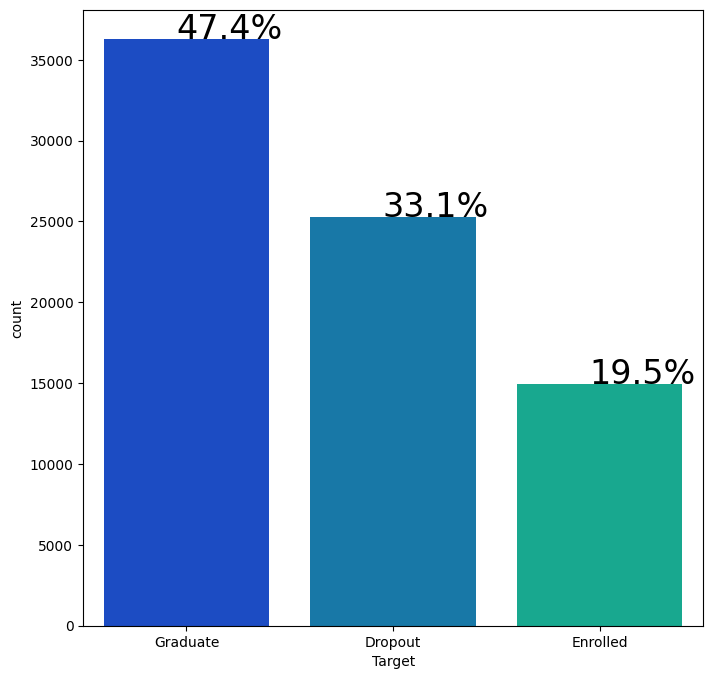

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x = df["Target"],palette='winter')
bar_plot(ax,df["Target"])

## Q 1 : is there a significant difference between Admission grade and Target variable?

In [ ]:
# plotting the relation between these two columns

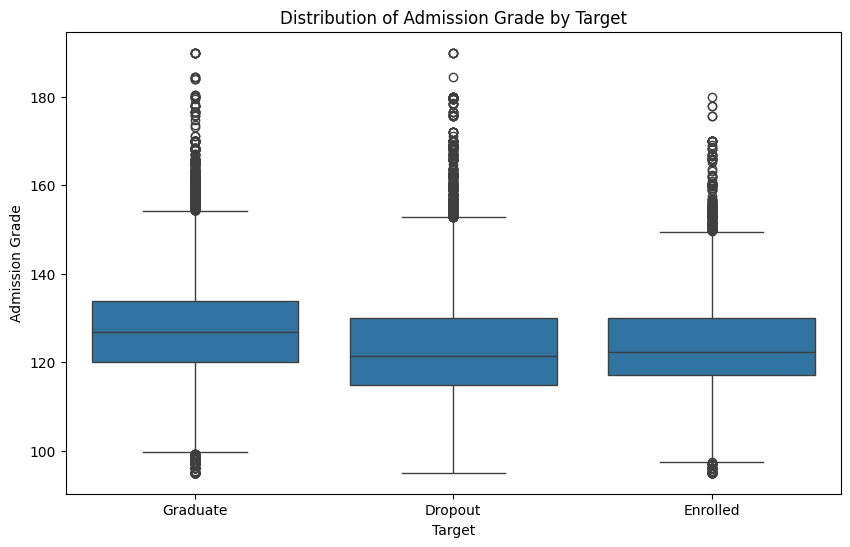

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Admission grade', data=df)

# Add plot title and labels
plt.title('Distribution of Admission Grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')

# Show the plot
plt.show()

## Step 1 : define the null and ulternate hypothesis

H0 : There is no significant difference in the means of the numerical variable across "Target" groups.

H1: At least one "Target" group mean is significantly different from the others.

##  Step 2 : Choosing the correct test

We are choosing one way Anova

One-way ANOVA is used to determine if there is a statistically significant difference in the means of a continuous variable across two or more independent groups.



## Step 3: calculating Pvalue and f statistics

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# seperating the data

graduate = df[df['Target'] == 'Graduate']['Admission grade']
dropout = df[df['Target'] == 'Dropout']['Admission grade']
enrolled = df[df['Target'] == 'Enrolled']['Admission grade']

In [ ]:
# Perform ANOVA
f_stat, p_value = f_oneway(graduate, dropout, enrolled)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)


ANOVA F-statistic: 1305.2842399119272
p-value: 0.0


In [ ]:
if p_value < 0.05:
    print("Significant difference in Admission grade among Target groups.")
else:
    print("No significant difference in Admission grade among Target groups.")

Significant difference in Admission grade among Target groups.


## Step 4: Draw conclusion from numbers

Since the p-value is less than the threshold then we can reject the null hypothesis


The significant p-value tells us that the mean "Admission grade" is not the same across the "Target" groups. In other words, the type of "Target" (Graduate, Dropout, Enrolled) is associated with differences in admission grades.


Since the test is statistically significant, we can conclude that there is a strong association between the "Target" variable and "Admission grade."

## Marital status

<ipython-input-12-a1b3da31feb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Marital status"],palette='winter')


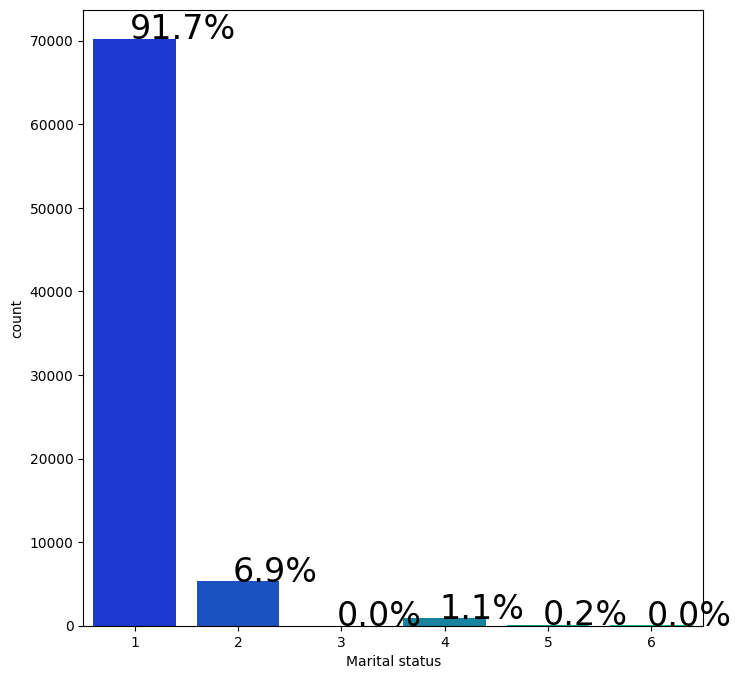

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x = df["Marital status"],palette='winter')
bar_plot(ax,df["Marital status"])

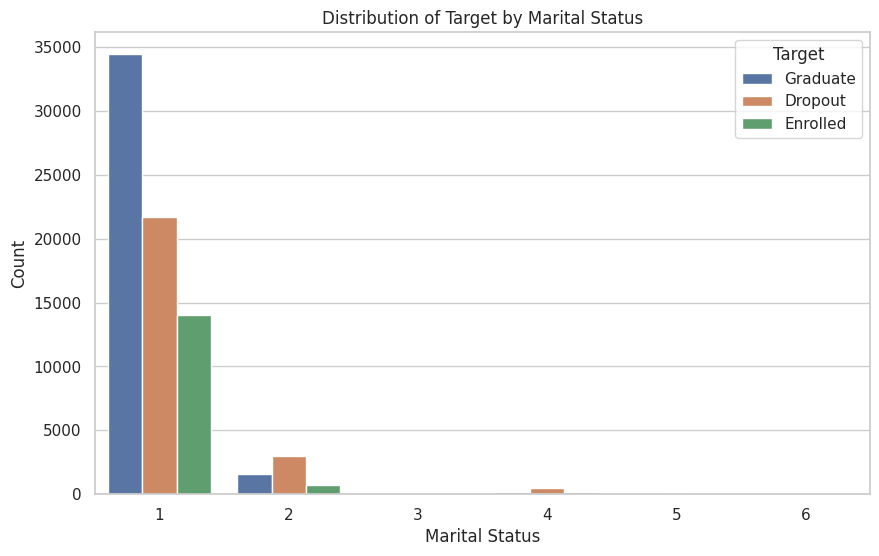

In [ ]:
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital status', hue='Target', data=df)

# Add plot title and labels
plt.title('Distribution of Target by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Target')

# Show the plot
plt.show()

## Q 2 : is marital status related to target ?

## Step 1: define the null and ulternate hypothesis

H0: There is no asociation between marital status and target variables.

H1 : There is association between marital status and target variables.

## Step 2 : choosing the correct test

As both are categorical variables Chi square test will be appropriate test for it.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(df['Marital status'], df['Target'])

In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square statistic: 1728.622672523396
p-value: 0.0


In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Marital Status and Target.")
else:
    print("Fail to reject the null hypothesis: No significant association between Marital Status and Target.")

Reject the null hypothesis: There is a significant association between Marital Status and Target.


## Q 3 : is there any correlation between GDP and Unemployment rate?

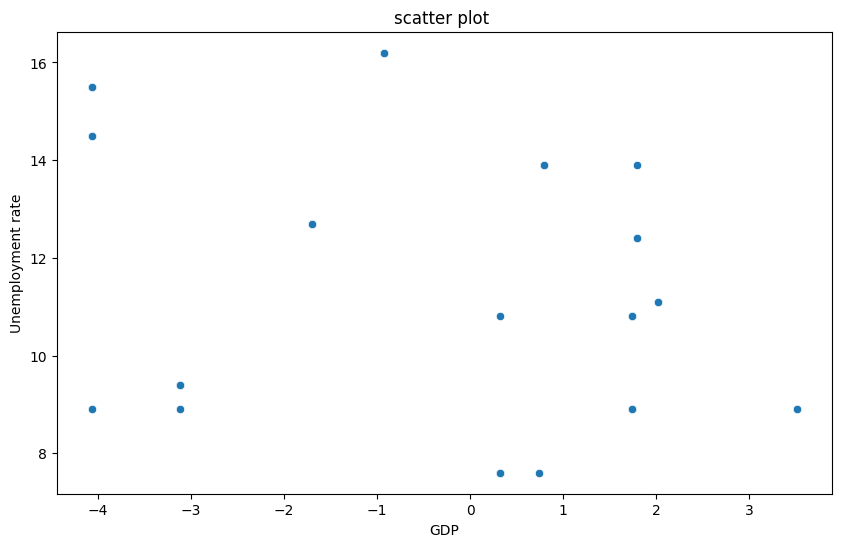

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Unemployment rate', data=df)

# Add plot title and labels
plt.title('scatter plot ')
plt.xlabel('GDP')
plt.ylabel('Unemployment rate')

# Show the plot
plt.show()

## Step 1 : defien null and ulternate hypothesis

H0 : There is no correlation between GDP and unemployment rate

H1 : There is correlation between GDP and Unemployment rate

## Step 2 : measuring p value and correlation

In [ ]:
from scipy.stats import pearsonr

# Example: Correlation between GDP and Unemployment Rate
corr_stat, p_value = pearsonr(df['GDP'], df['Unemployment rate'])
print("Pearson correlation coefficient:", corr_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant correlation between GDP and Unemployment Rate.")
else:
    print("No significant correlation between GDP and Unemployment Rate.")


Pearson correlation coefficient: -0.2989414968783589
p-value: 0.0
Significant correlation between GDP and Unemployment Rate.


## Measuring p value and correlation between GDP and Inflation rate

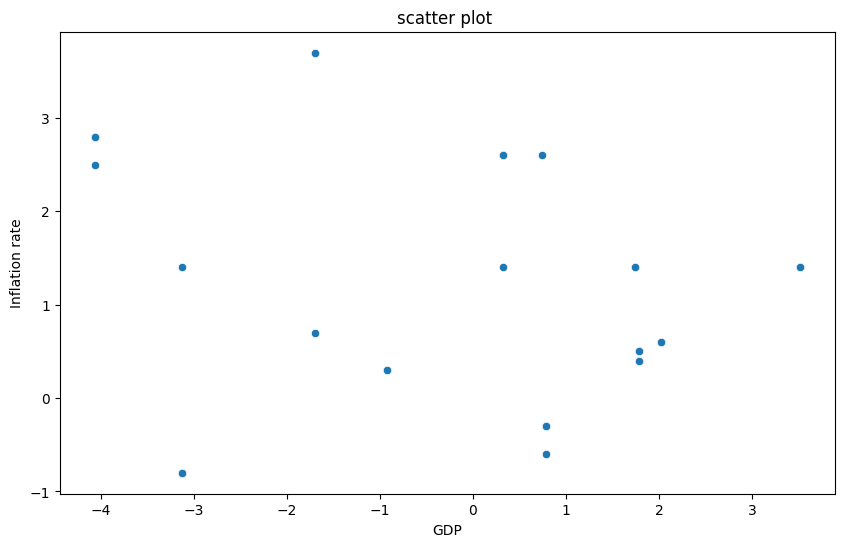

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Inflation rate', data=df)

# Add plot title and labels
plt.title('scatter plot ')
plt.xlabel('GDP')
plt.ylabel('Inflation rate')

# Show the plot
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Example: Correlation between GDP and Unemployment Rate
corr_stat, p_value = pearsonr(df['GDP'], df['Inflation rate'])
print("Pearson correlation coefficient:", corr_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant correlation between GDP and Unemployment Rate.")
else:
    print("No significant correlation between GDP and Unemployment Rate.")


Pearson correlation coefficient: -0.08573604259225212
p-value: 8.748367056801901e-125
Significant correlation between GDP and Unemployment Rate.


## Correlation Analysis

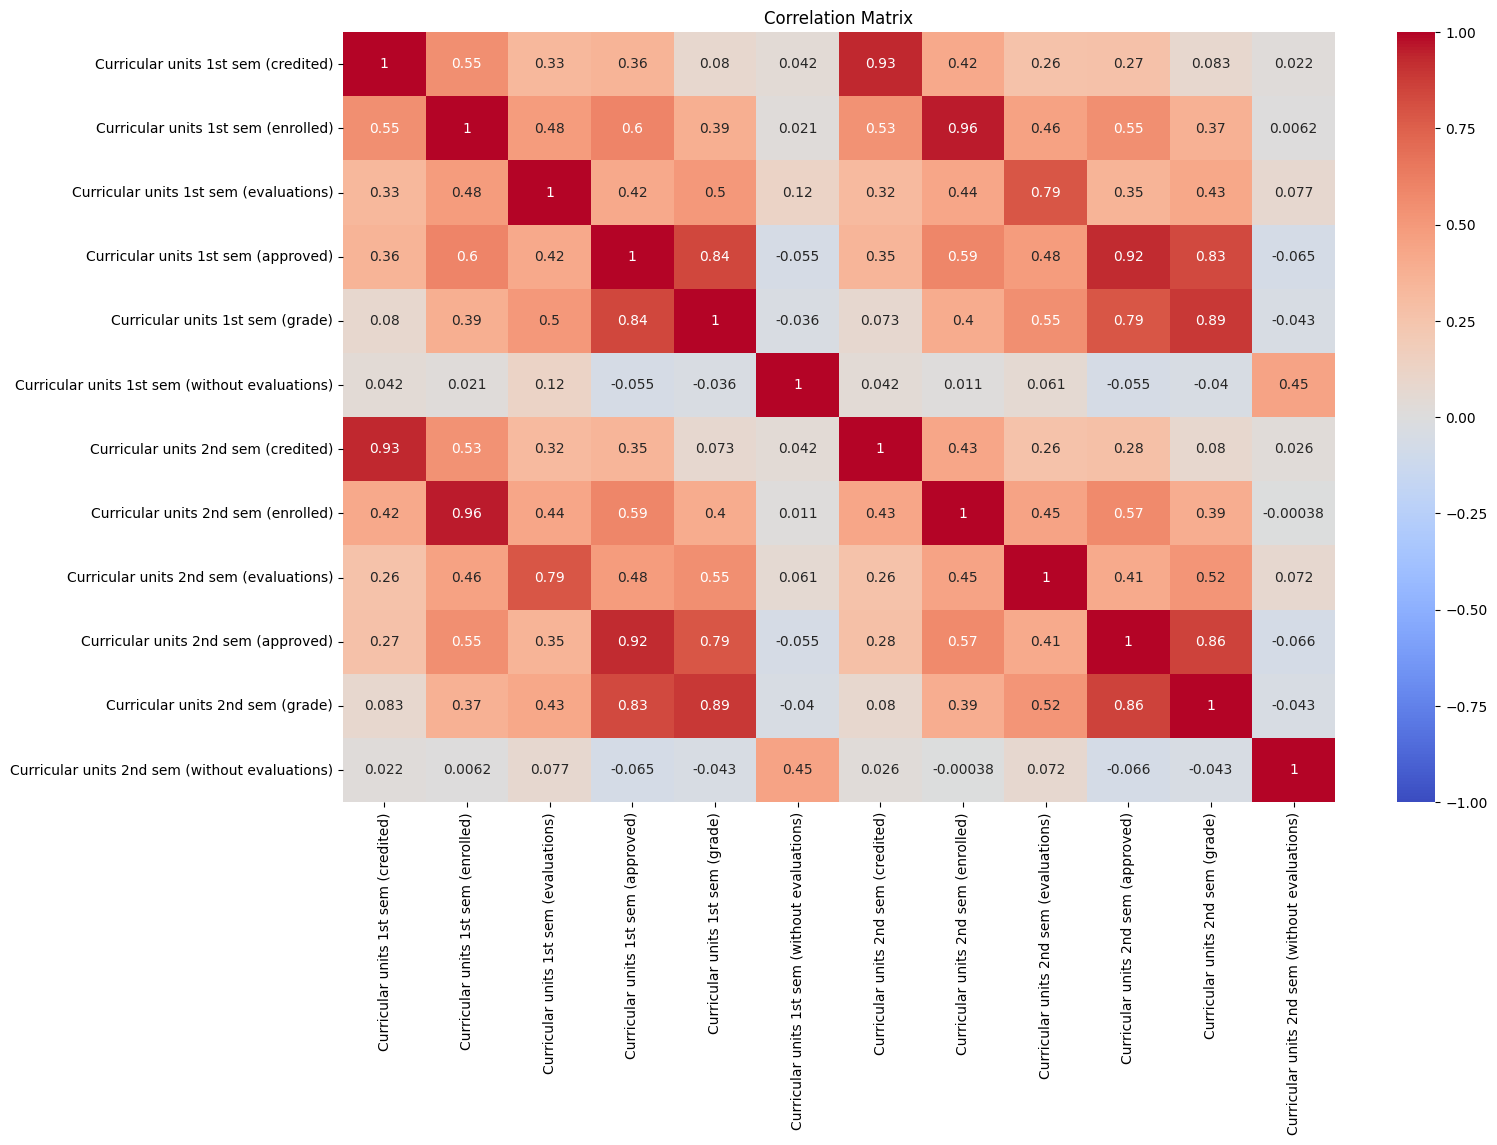

In [ ]:
numerical_cols = [
                     'Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (enrolled)',
                       'Curricular units 1st sem (evaluations)',
                    'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)',
                    'Curricular units 1st sem (without evaluations)',
                    'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)',
                    'Curricular units 2nd sem (evaluations)',
                    'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)',
                    'Curricular units 2nd sem (without evaluations)'
                   ]

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()